# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import plotly.express as px
import altair as alt

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
def custom_accuracy(y_test, y_pred, thresold):
    correct = 0
    total = len(y_pred)
    for i in range(0,total):
        if(abs(y_pred[i]-y_test.to_numpy()[i]) <= thresold):
            correct += 1
    return ((correct/total)*100)

# Reading Data

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/IPL_Dataset/deliveries.csv')
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/IPL_Dataset/matches.csv')
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Getting Basic Information and Statistics

In [ ]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
df2.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Data Preprocessing

### Getting Null Values in **city** Column and filling it appropriately

In [ ]:
df2[df2['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


Filling Null Values with **Dubai** since all venues are in Dubai

In [ ]:
df2['city'] = df2['city'].fillna('Dubai')

### Getting Unique values in **team1** and replacing repeated values appropriately

In [ ]:
df2['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Replacing **Rising Pune Supergiant** by **Rising Pune Supergiants**

In [ ]:
df2['team1'] = df2['team1'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
df2['team2'] = df2['team2'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
df2['toss_winner'] = df2['toss_winner'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
df2['winner'] = df2['winner'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")

### Dropping rows having null values in **winner**

In [ ]:
df2 = df2[df2['winner'].notnull()]

### Dropping columns having large missing values

Dropping column **umpire3**

In [ ]:
df2.drop("umpire3", axis=1, inplace=True)

### Assigning copy of **df2** to **matches** after preprocessing

In [ ]:
matches = df2.copy()

### Converting String columns to Numerical values using **LabelEncoder**

In [ ]:
enc = LabelEncoder()

pd.options.mode.chained_assignment = None  # To remove warning

df2["city"] = enc.fit_transform(df2["city"])
df2["team1"] = enc.fit_transform(df2["team1"])
df2["team2"] = enc.fit_transform(df2["team2"])
df2["toss_winner"] = enc.fit_transform(df2["toss_winner"])
df2["toss_decision"] = enc.fit_transform(df2["toss_decision"])
df2["winner"] = enc.fit_transform(df2["winner"])
df2["venue"] = enc.fit_transform(df2["venue"])

# Performing EDA

In [ ]:
matplotlib.rcParams['figure.figsize'] = (14, 8)

### 1) Maximum wins by team in particular season

Making new DataFrame **wins_per_season_df** for storing values for plotting graph

In [ ]:
wins_per_season = matches.groupby('season')['winner'].value_counts()
wins_per_season_df = pd.DataFrame(columns = ['year', 'team', 'wins'])
year = 2008

In [ ]:
for item in wins_per_season.iteritems():
  if (item[0][0] == year):
    win_series = pd.DataFrame({  
        'year' : [item[0][0]],
        'team' : [item[0][1]],
        'wins' : [item[1]]
    })
    wins_per_season_df = wins_per_season_df.append(win_series)
    year += 1

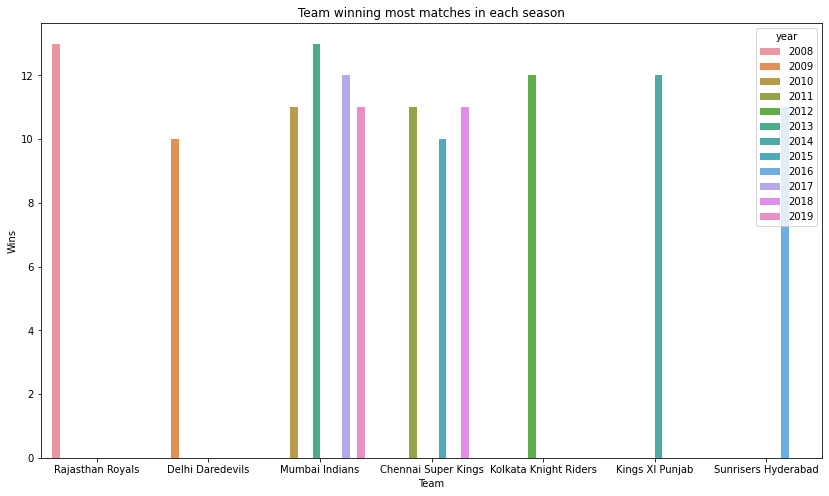

In [ ]:
sb.barplot(x='team', y='wins', hue='year', data=wins_per_season_df)
plt.title('Team winning most matches in each season')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.show()

**Observations :-**
1. Team winning most matches in a season, most number of times, is **Mumbai Indians** (4 times in 2010, 2013, 2017 and 2019)
1. **Rajasthan Royals** and **Mumbai Indians** have won most number of matches in a single season, winning 13 matches in 2010 and 2013 respectively

### 2) Venues hosting most number of IPL Matches

In [ ]:
matches_at_venue = matches['venue'].value_counts()
matches_at_venue_df = pd.DataFrame(columns=['venue', 'matches'])
for item in matches_at_venue.iteritems():
  match_df = pd.DataFrame({
      'venue' : [item[0]],
      'matches' : [item[1]]
  })
  matches_at_venue_df = matches_at_venue_df.append(match_df, ignore_index = True)

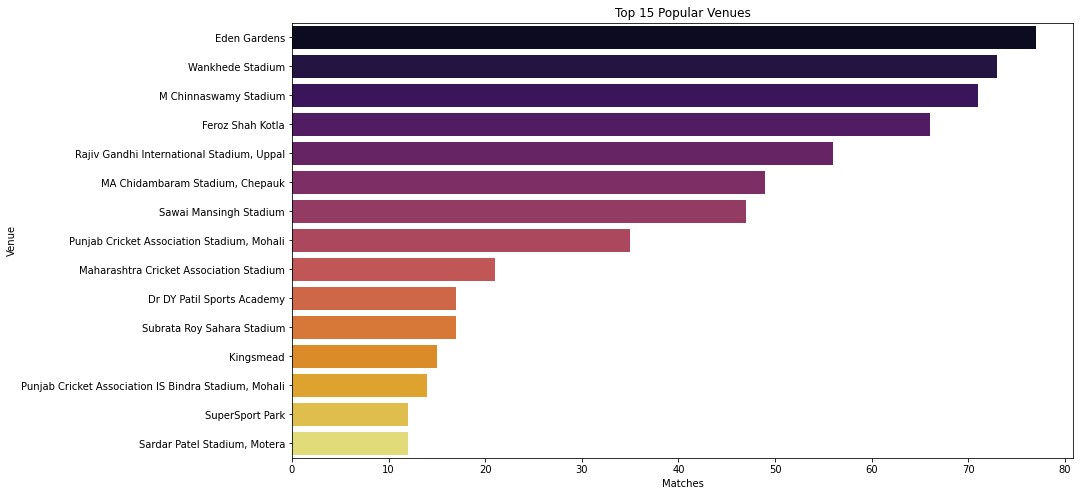

In [ ]:
sb.barplot(x='matches', y='venue', data=matches_at_venue_df.iloc[np.arange(0,15),:], palette='inferno')
plt.title('Top 15 Popular Venues')
plt.xlabel('Matches')
plt.ylabel('Venue')
plt.show()

**Observation :-**
1. Most number of matches are played at **Eden Gardens (77 matches)** followed by **Wankhede Stadium (73)**.
1. 41 Different Venues have hosted an IPL Match till now

### 3) Teams having highest win percentage

In [ ]:
team_wins = matches['winner'].value_counts()
team_wins_df = pd.DataFrame(columns = ['team', 'wins'])
for item in team_wins.iteritems():
  temp_win_df = pd.DataFrame({
      'team' : [item[0]],
      'wins' : [item[1]]
  })
  team_wins_df = team_wins_df.append(temp_win_df, ignore_index = True)

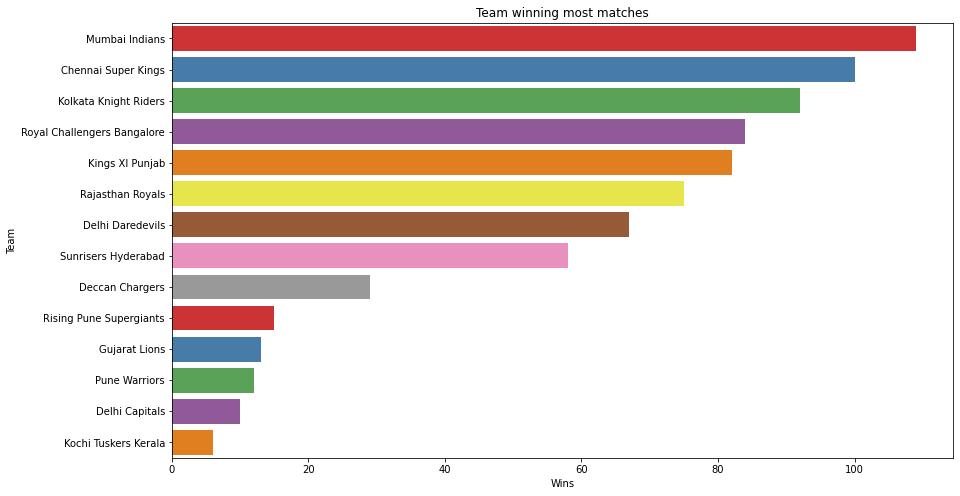

In [ ]:
sb.barplot(x='wins', y='team', data=team_wins_df, palette='Set1')
plt.title('Team winning most matches')
plt.xlabel('Wins')
plt.ylabel('Team')
plt.show()

**Observation :-**
1. **Mumbai Indians** is the most successful team in **IPL** in terms of number of matches won, winning **109** matches, followed by **Chennai Super Kings**, winning **100** matches. 

Since some teams not played some seasons, it won't be fair to judge by number of wins. Thus, we will see win percentage.

In [ ]:
team_winper = (matches['winner'].value_counts() / (matches['team1'].value_counts() + matches['team2'].value_counts()) * 100).sort_values(ascending=False)
team_winper_df = pd.DataFrame(columns=['team', 'win percent'])
for item in team_winper.iteritems():
  temp_winper_df = pd.DataFrame({
      'team' : [item[0]],
      'win percent' : [item[1]]
  })
  team_winper_df = team_winper_df.append(temp_winper_df, ignore_index = True)

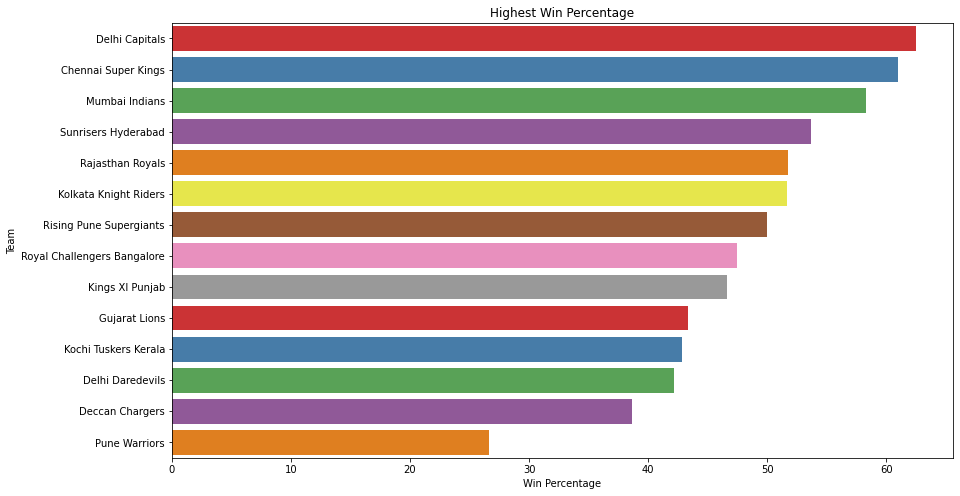

In [ ]:
sb.barplot(x='win percent', y='team', data=team_winper_df, palette='Set1')
plt.title('Highest Win Percentage')
plt.xlabel('Win Percentage')
plt.ylabel('Team')
plt.show()

**Observation :-**
1. Surprisingly, **Delhi Capitals** has the highest win percentage, more than both **Chennai Super Kings** and **Mumbai Indians**.

### 4) Most Player of the Match Awards

In [ ]:
potm_award = matches['player_of_match'].value_counts()
potm_award_df = pd.DataFrame(columns = ['player', 'awards'])
i=0
for item in potm_award.iteritems():
  if i>=15:
    break
  else:
    temp_potm = pd.DataFrame({
        'player' : [item[0]],
        'awards' : [item[1]]
    })
    potm_award_df = potm_award_df.append(temp_potm, ignore_index=True)
    i += 1

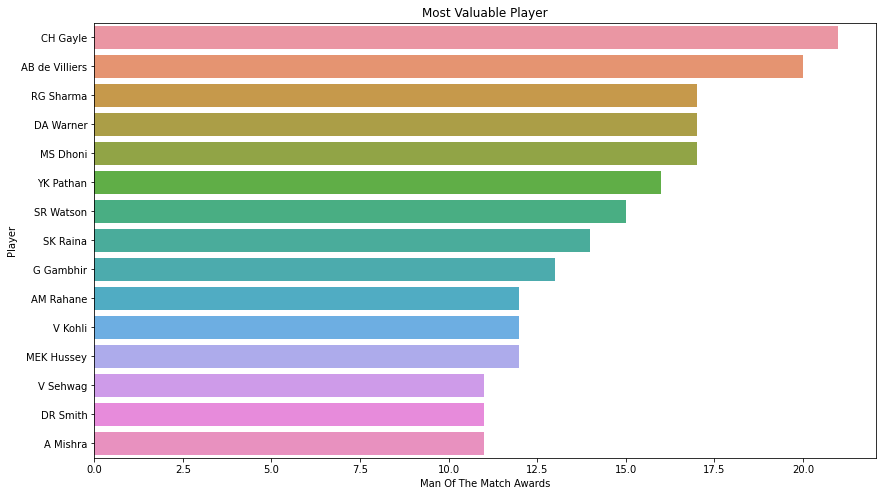

In [ ]:
sb.barplot(x='awards', y='player', data=potm_award_df)
plt.title('Most Valuable Player')
plt.xlabel('Man Of The Match Awards')
plt.ylabel('Player')
plt.show()

**Observation :-**
1. **Chris Gayle** has won the most Player of the Match award, winning 21 times followed by **AB de Villiers** (20 times)
1. **Amit Mishra** is the only **Bowler** in Top 15.
1. 9 Indians and 6 Overseas players are there in Top 15.

### 5) Luckiest Team in terms of winning Toss

In [ ]:
toss_wins = matches['toss_winner'].value_counts()
toss_wins_df = pd.DataFrame(columns = ['team', 'toss wins'])
for item in toss_wins.iteritems():
  temp_toss_win_df = pd.DataFrame({
      'team' : [item[0]],
      'toss wins' : [item[1]]
  })
  toss_wins_df = toss_wins_df.append(temp_toss_win_df, ignore_index = True)

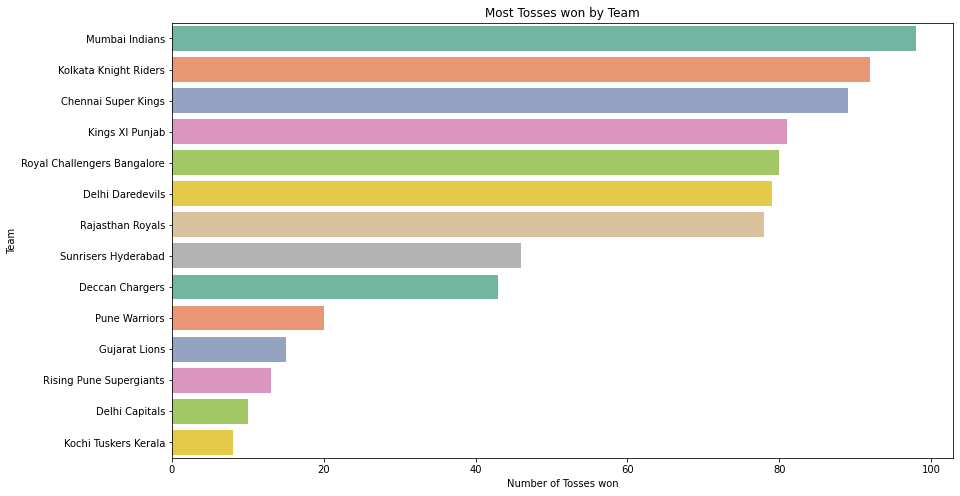

In [ ]:
sb.barplot(x='toss wins', y='team', data=toss_wins_df, palette='Set2')
plt.title('Most Tosses won by Team')
plt.xlabel('Number of Tosses won')
plt.ylabel('Team')
plt.show()

**Observation :-**
1. **Mumbai Indians** has won most tosses, followed by **Kolkata Knight Riders**.

Again to remove bias against teams playing less matches, we take win percentage

In [ ]:
toss_winper = (matches['toss_winner'].value_counts() / (matches['team1'].value_counts() + matches['team2'].value_counts()) * 100).sort_values(ascending=False)
toss_winper_df = pd.DataFrame(columns = ['team', 'toss win percent'])
for item in toss_winper.iteritems():
  temp_toss_winper_df = pd.DataFrame({
      'team' : [item[0]],
      'toss win percent' : [item[1]]
  })
  toss_winper_df = toss_winper_df.append(temp_toss_winper_df, ignore_index = True)

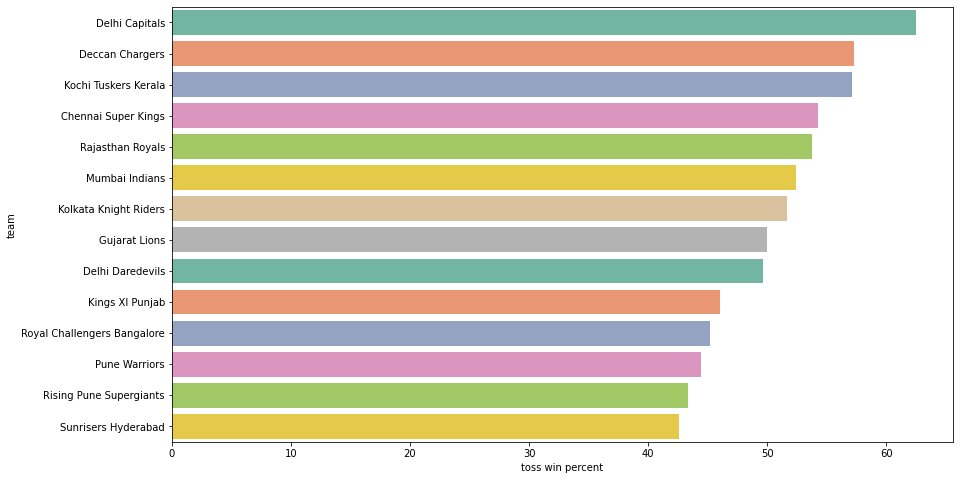

In [ ]:
sb.barplot(x='toss win percent', y='team', data=toss_winper_df, palette='Set2')
plt.show()

**Observation :-**
1. **Delhi Capitals** is the luckiest team in terms of winning toss.
1. **Sunrisers Hyderabad**, on the other hand, is the unluckiest team.

### 6) Top 10 Greatest Victories

In [ ]:
vict_by_runs = matches.sort_values('win_by_runs', ascending=False).iloc[:,[0,2,4,5,11]].head(10)
vict_by_wickets = matches.sort_values('win_by_wickets', ascending=False).iloc[:,[4,5,10,12]].head(11)

In [ ]:
vict_by_runs['team1 vs team2'] = 0
vict_by_wickets['team1 vs team2'] = 0

Making values unique in column **team1 vs team2**, adding **id** to its end

In [ ]:
for i in np.arange(10):
  vict_by_runs.iloc[i,5] = vict_by_runs.iloc[i,2] + ' vs ' + vict_by_runs.iloc[i,3] + ', ' + str(vict_by_runs.iloc[i,0])

vict_by_wickets['team2 vs team1'] = vict_by_wickets['team2'] + ' vs ' + vict_by_wickets['team1']

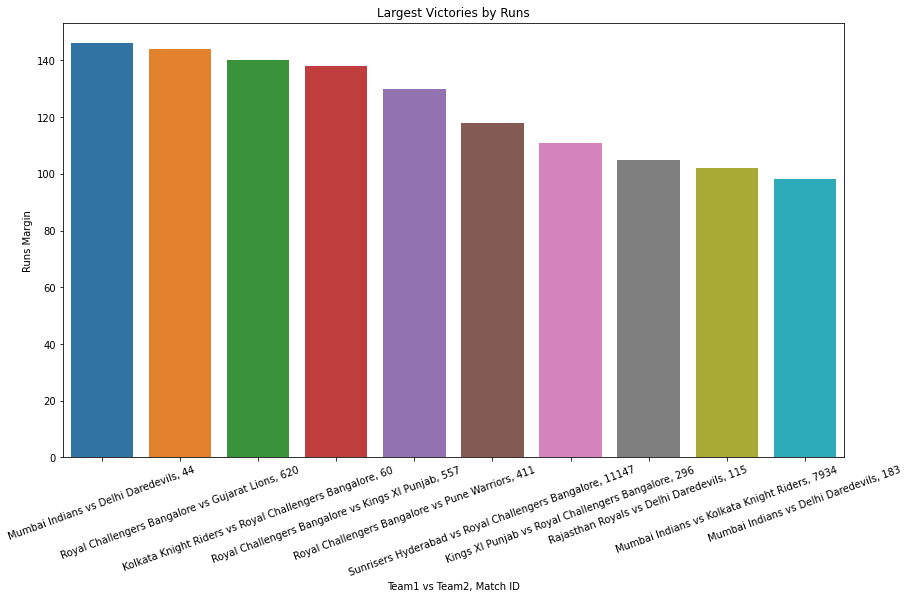

In [ ]:
sb.barplot(x='team1 vs team2', y='win_by_runs', data=vict_by_runs)
plt.xticks(rotation=20)
plt.title('Largest Victories by Runs')
plt.xlabel('Team1 vs Team2, Match ID')
plt.ylabel('Runs Margin')
plt.show()

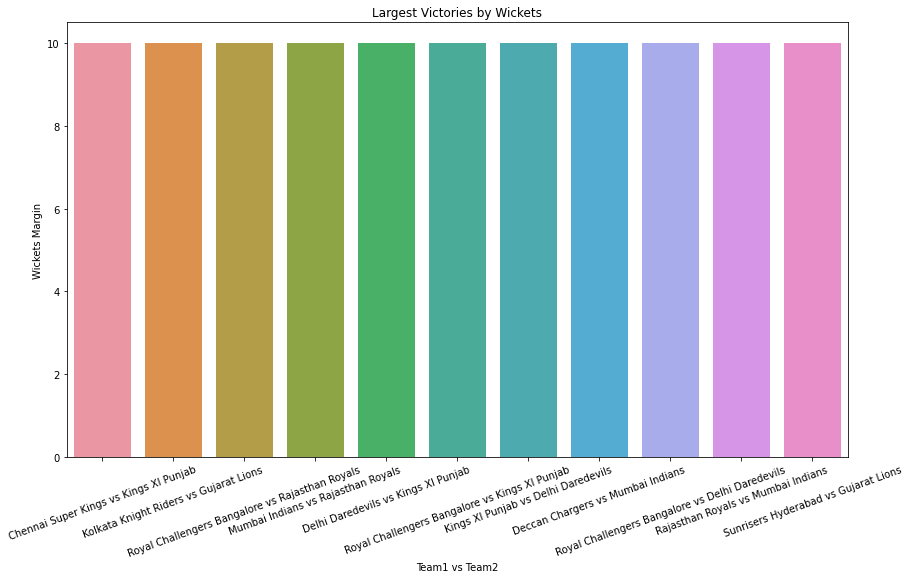

In [ ]:
sb.barplot(x='team2 vs team1', y='win_by_wickets', data=vict_by_wickets)
plt.xticks(rotation=20)
plt.title('Largest Victories by Wickets')
plt.xlabel('Team1 vs Team2')
plt.ylabel('Wickets Margin')
plt.show()

**Observation :-**
1. Highest margin of victory in terms of runs is **146 runs**, achieved by **Mumbai Indians** against **Delhi Daredevils**
1. Highest margin of victory in terms of wickets is **10 wickets** which is achieved **11 times** by teams as seen in plot.

### 7) Most 50s and 100s scored by players

Creating two DataFrames namely **fifties_all** and **hundreds_all** for storing all 50s and 100s innings respectively. 

Further, creating two more DataFrames, namely **fifties_count** and **hundreds_count**, for storing count of 50s and 100s,respectively, scored by each batsman

In [ ]:
fifties_all = df1.groupby(['match_id', 'batsman']).sum().iloc[:,9].to_frame()
fifties_all = fifties_all[(fifties_all['batsman_runs']>=50) & (fifties_all['batsman_runs']<100)]
fifties_count = fifties_all.groupby('batsman').count().sort_values(by='batsman_runs')
fifties_count.columns=['50s']
fifties_count.reset_index(inplace=True)

hundreds_all = df1.groupby(['match_id', 'batsman']).sum().iloc[:,9].to_frame()
hundreds_all = hundreds_all[hundreds_all['batsman_runs']>=100]
hundreds_count = hundreds_all.groupby('batsman').count().sort_values(by='batsman_runs')
hundreds_count.columns=['100s']
hundreds_count.reset_index(inplace=True)

In [ ]:
def plot_fifties(no_of_batsman):
  fig = px.line(fifties_count.tail(no_of_batsman), x='batsman', y='50s', title='Number of Fifties', height=500, width=900)
  fig.show()
no_of_batsman = np.arange(10,151,1)
widgets.interactive(plot_fifties, no_of_batsman=no_of_batsman)

interactive(children=(Dropdown(description='no_of_batsman', options=(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

In [ ]:
def plot_hundreds(no_of_batsman):
  fig = px.line(hundreds_count.tail(no_of_batsman), x='batsman', y='100s', title='Number of Centuries', height=500, width=900)
  fig.show()
no_of_batsman = np.arange(8,37,1)
widgets.interactive(plot_hundreds, no_of_batsman=no_of_batsman)

interactive(children=(Dropdown(description='no_of_batsman', options=(8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…

Merging **fifties_count** and **hundreds_count** to create new DataFrame **batsman_points** and adding new column **points** to it

In [ ]:
batsman_points = pd.merge(fifties_count, hundreds_count, how='left', left_on='batsman', right_on='batsman')
batsman_points.fillna(0, inplace=True)
batsman_points['points'] = batsman_points['50s']*5 + batsman_points['100s']*10
batsman_points.sort_values(by='points', inplace=True, ignore_index=True)

In [ ]:
def plot_points(no_of_batsman):
  fig = px.line(batsman_points.tail(no_of_batsman), x='batsman', y='points', title='Points of Batsman on the basis of 100s and 50s', height=500, width=900)
  fig.show()
no_of_batsman = np.arange(10,150,1)
widgets.interactive(plot_points, no_of_batsman=no_of_batsman)

interactive(children=(Dropdown(description='no_of_batsman', options=(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

### 8) Comparison between 2 batsmen

Creating new DataFrames, namely **fours**, **sixes** and **batsman_runs**, for storing 4s, 6s and runs, respectively, by each batsman

In [ ]:
fours = df1[df1['batsman_runs']==4].groupby('batsman').count()['batsman_runs'].sort_values(ascending=False).to_frame()
fours.columns = ['4s']
fours.reset_index(inplace=True)

sixes = df1[df1['batsman_runs']==6].groupby('batsman').count()['batsman_runs'].sort_values(ascending=False).to_frame()
sixes.columns = ['6s']
sixes.reset_index(inplace=True)

batsman_runs = df1.groupby('batsman').sum()['batsman_runs'].to_frame().reset_index().sort_values(by='batsman_runs', ascending=False, ignore_index=True)

Merging above created DataFrames to **batsman_points**

In [ ]:
batsman_points = pd.merge(batsman_runs, batsman_points, how='left', left_on='batsman', right_on='batsman')
batsman_points.fillna(0, inplace=True)
batsman_points = pd.merge(batsman_points, fours, how='left', left_on='batsman', right_on='batsman')
batsman_points = pd.merge(batsman_points, sixes, how='left', left_on='batsman', right_on='batsman')
batsman_points = batsman_points[batsman_points['batsman_runs']>250]

Converting all the parameters to the scale of 0-100

In [ ]:
batsman_points['batsman_runs'] = batsman_points['batsman_runs']/(batsman_points['batsman_runs'].max())*100
batsman_points['50s'] = batsman_points['50s']/(batsman_points['50s'].max())*100
batsman_points['100s'] = batsman_points['100s']/(batsman_points['100s'].max())*100
batsman_points['points'] = batsman_points['points']/(batsman_points['points'].max())*100
batsman_points['4s'] = batsman_points['4s']/(batsman_points['4s'].max())*100
batsman_points['6s'] = batsman_points['6s']/(batsman_points['6s'].max())*100

In [ ]:
def compare_batsmen(first_bat, second_bat):
  x = batsman_points[batsman_points['batsman'] == first_bat]
  y = batsman_points[batsman_points['batsman'] == second_bat]
  
  data = [go.Scatterpolar(
          r = [x['batsman_runs'].values[0], x['50s'].values[0], x['100s'].values[0], x['4s'].values[0], x['6s'].values[0], x['points'].values[0]],
          theta = ['Runs','50s','100s','4s','6s','Points'],
          name = first_bat, fill='toself'),
    
          go.Scatterpolar(
          r = [y['batsman_runs'].values[0], y['50s'].values[0], y['100s'].values[0], y['4s'].values[0], y['6s'].values[0], y['points'].values[0]],
          theta = ['Runs','50s','100s','4s','6s','Points'],
          name = second_bat, fill='toself')]

  layout = go.Layout(title = f'Comparison between {first_bat} and {second_bat}')
  
  fig = go.Figure(data=data, layout=layout)
  fig.show()

first_bat = batsman_points['batsman'].tolist()
second_bat = first_bat.copy()
widgets.interactive(compare_batsmen, first_bat=first_bat, second_bat=second_bat)

interactive(children=(Dropdown(description='first_bat', options=('V Kohli', 'SK Raina', 'RG Sharma', 'DA Warne…

### 9) Scatter Plot for batsman's strike rate per over

In [ ]:
top_30 = batsman_runs.iloc[:30,0].tolist()

sr_per_over = df1.pivot_table(index=['batsman', 'over'], aggfunc=['count','sum'], values='batsman_runs').fillna(0)
sr_per_over.reset_index(inplace=True)
sr_per_over.columns = ['batsman', 'over', 'balls', 'runs']
sr_per_over['strike_rate'] = sr_per_over['runs'] / sr_per_over['balls'] * 100
sr_per_over['strike_rate'] = round(sr_per_over['strike_rate'], 1)
sr_per_over = sr_per_over[sr_per_over['batsman'].isin(top_30)]

In [ ]:
alt.Chart(sr_per_over).mark_point(shape="circle").encode(
    x='over',
    y='strike_rate',
    color='batsman',
    size='balls'
).properties(title='Strike Rate per over', width=800, height=600)

alt.Chart(...)

# Classification Models

### Feature Engineering

Storing features and target variable into **x** and **y** respectively 


In [ ]:
x = df2.iloc[:,[2,4,5,6,7,14]]
y = df2.iloc[:,10]

Creating some new columns to get better understanding 

In [ ]:
pd.options.mode.chained_assignment = None  # To remove warning

x.loc[matches['winner']==matches['team1'],'team1_win'] = 1
x.loc[matches['winner']!=matches['team1'],'team1_win'] = 0

x.loc[matches['toss_winner']==matches['team1'],'team1_toss_win'] = 1
x.loc[matches['toss_winner']!=matches['team1'],'team1_toss_win'] = 0

x.loc[((matches['toss_winner']==matches['team1']) & (matches['toss_decision']=='bat')),'team1_bat'] = 1
x.loc[((matches['toss_winner']==matches['team2']) & (matches['toss_decision']=='field')),'team1_bat'] = 1

In [ ]:
#x.head()

In [ ]:
display(x['team1_win'].value_counts())
display(x['team1_toss_win'].value_counts())
display(x['team1_bat'].value_counts())

0.0    417
1.0    335
Name: team1_win, dtype: int64

0.0    460
1.0    292
Name: team1_toss_win, dtype: int64

1.0    752
Name: team1_bat, dtype: int64

We can see that all the values in *team1_bat* column are same and hence, of no use to us. Thus we drop this column

In [ ]:
x.drop('team1_bat', axis=1, inplace=True)

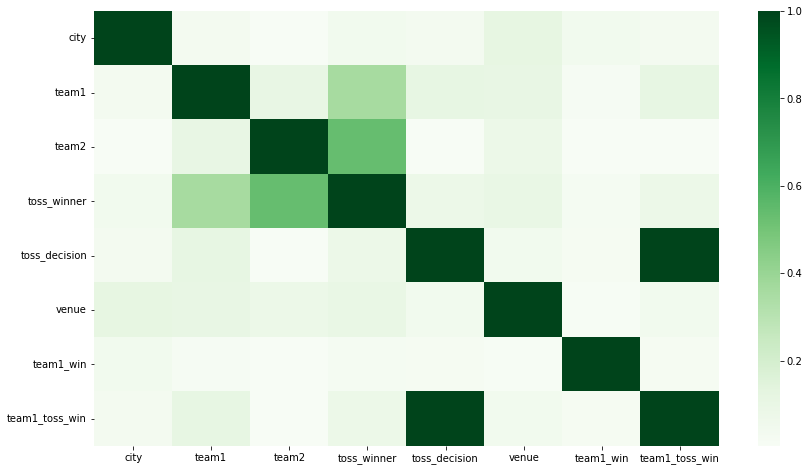

In [ ]:
sb.heatmap(abs(x.corr()), cmap='Greens')
plt.show()

**team1_toss_win** is strongly correlated to **toss_decision**. Thus, we drop **team1_toss_win**

In [ ]:
x.drop('team1_toss_win', axis=1, inplace=True)

### Splitting data for training and testing

Splitting dataset into train-test set in $70:30$

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=6, shuffle=True)
print(f'Shape of x_train : {x_train.shape}')
print(f'Shape of x_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of x_train : (526, 7)
Shape of x_test : (226, 7)
Shape of y_train : (526,)
Shape of y_test : (226,)


### Random Forest Classifier

In [ ]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
%%time
param_grid1 = {
    'n_estimators' : np.arange(100,401,50),
    'max_depth' : np.arange(5,31,5)
}
gs_rfc = GridSearchCV(RandomForestClassifier(), param_grid1, cv=4)
gs_rfc.fit(x_train, y_train)

CPU times: user 1min 14s, sys: 497 ms, total: 1min 15s
Wall time: 1min 15s


In [ ]:
gs_rfc.best_params_

{'max_depth': 15, 'n_estimators': 150}

In [ ]:
RFC = RandomForestClassifier(n_estimators = gs_rfc.best_params_['n_estimators'], max_depth = gs_rfc.best_params_['max_depth'])
RFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=150)

In [ ]:
pred1 = RFC.predict(x_test)
print(f'Accuracy : {round(accuracy_score(y_test, pred1)*100,2)}%')
print(f'Precision : {round(precision_score(y_test, pred1, average="weighted")*100,2)}%')
print(f'Recall : {round(recall_score(y_test, pred1, average="weighted")*100,2)}%')
print(f'F1 Score : {round(f1_score(y_test, pred1, average="weighted")*100,2)}%')

Accuracy : 82.74%
Precision : 82.54%
Recall : 82.74%
F1 Score : 82.43%


### Decision Tree Classifier

In [ ]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
%%time
param_grid2 = {
    'splitter' : ['best', 'random'],
    'max_depth' : np.arange(5,31,5),
    'random_state' : np.arange(1,30,4)
}
gs_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid2, cv=4)
gs_dtc.fit(x_train, y_train)

CPU times: user 2.39 s, sys: 14.1 ms, total: 2.41 s
Wall time: 2.41 s


In [ ]:
gs_dtc.best_params_

{'max_depth': 15, 'random_state': 1, 'splitter': 'random'}

In [ ]:
DTC = DecisionTreeClassifier(splitter = gs_dtc.best_params_['splitter'],
                             max_depth = gs_dtc.best_params_['max_depth'],
                             random_state = gs_dtc.best_params_['random_state'])
DTC.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=1, splitter='random')

In [ ]:
pred2 = DTC.predict(x_test)
print(f'Accuracy : {round(accuracy_score(y_test, pred2)*100,2)}%')
print(f'Precision : {round(precision_score(y_test, pred2, average="weighted")*100,2)}%')
print(f'Recall : {round(recall_score(y_test, pred2, average="weighted")*100,2)}%')
print(f'F1 Score : {round(f1_score(y_test, pred2, average="weighted")*100,2)}%')

Accuracy : 96.9%
Precision : 97.03%
Recall : 96.9%
F1 Score : 96.88%


### SVM

In [ ]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [ ]:
%%time
param_grid3 = {
    'decision_function_shape' : ['ovo', 'ovr'],
    'degree' : np.arange(3,6),
    'random_state' : np.arange(1,30,4)
}
gs_svc = GridSearchCV(SVC(), param_grid3, cv=4)
gs_svc.fit(x_train, y_train)

CPU times: user 4.99 s, sys: 12.9 ms, total: 5.01 s
Wall time: 4.99 s


In [ ]:
gs_svc.best_params_

{'decision_function_shape': 'ovo', 'degree': 3, 'random_state': 1}

In [ ]:
svc = SVC(decision_function_shape = gs_svc.best_params_['decision_function_shape'],
          degree = gs_svc.best_params_['degree'],
          random_state = gs_svc.best_params_['random_state'])
svc.fit(x_train, y_train)

SVC(decision_function_shape='ovo', random_state=1)

In [ ]:
pred3 = svc.predict(x_test)
print(f'Accuracy : {round(accuracy_score(y_test, pred3)*100,2)}%')
print(f'Precision : {round(precision_score(y_test, pred3, average="weighted")*100,2)}%')
print(f'Recall : {round(recall_score(y_test, pred3, average="weighted")*100,2)}%')
print(f'F1 Score : {round(f1_score(y_test, pred3, average="weighted")*100,2)}%')

Accuracy : 42.48%
Precision : 39.69%
Recall : 42.48%
F1 Score : 40.65%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



As seen from above, we can conclude that **Decision Tree Classifier** model has best accuracy

# Regression Models

### Data Preprocessing

In [ ]:
df3 = pd.merge(matches, df1, left_on='id', right_on='match_id', how='right')
df3 = df3[df3['season'].notnull()]

In [ ]:
#df3.head()

In [ ]:
df3['id'] = df3['id'].astype('int')
df3['season'] = df3['season'].astype('int')
df3['dl_applied'] = df3['dl_applied'].astype('int')
df3['win_by_runs'] = df3['win_by_runs'].astype('int')
df3['win_by_wickets'] = df3['win_by_wickets'].astype('int')

### Feature Engineering

In [ ]:
df3['is_wicket'] = 0
df3['is_wicket'] = df3[df3['player_dismissed'].notnull()]['is_wicket'].replace(0, 1)
df3['is_wicket'] = df3['is_wicket'].fillna(0)
df3['is_wicket'] = df3['is_wicket'].astype('int')

In [ ]:
df3['inning'] = df3['batting_team'] + df3['id'].astype('str')
#df3.head()

In [ ]:
innings_all = df3['inning'].unique()
innings_all

array(['Sunrisers Hyderabad1', 'Royal Challengers Bangalore1',
       'Mumbai Indians2', ..., 'Chennai Super Kings11414',
       'Mumbai Indians11415', 'Chennai Super Kings11415'], dtype=object)

In [ ]:
team_runs = df3.copy()
team_runs = team_runs.groupby('inning').sum()['total_runs'].to_frame().reset_index()

In [ ]:
df4 = pd.merge(team_runs, df3, how='right', left_on='inning', right_on='inning')

In [ ]:
#df4.head()

In [ ]:
%%time
new_ipl = pd.DataFrame()
for i in np.arange(0, len(innings_all)):
  temp_inning = df4[df4['inning']==innings_all[i]]
  temp_inning = temp_inning.sort_values(by = ['over', 'ball'], ascending = [True, True])
  temp_inning = temp_inning[['over', 'ball', 'total_runs_y', 'is_wicket', 'total_runs_x']]
  temp_inning['cumsum_runs'] = temp_inning['total_runs_y'].cumsum()
  temp_inning['cumsum_wickets'] = temp_inning['is_wicket'].cumsum()
  new_ipl = pd.concat([new_ipl, temp_inning])

CPU times: user 25.1 s, sys: 347 ms, total: 25.5 s
Wall time: 25.4 s


In [ ]:
#new_ipl.head()

In [ ]:
%%time
df5 = pd.DataFrame()
for i in np.arange(0, len(innings_all)):
  temp_inning = df4[df4['inning']==innings_all[i]]
  temp_inning = temp_inning.reset_index()
  temp_inning = temp_inning.drop('index', axis=1)
  temp_inning['wkt_last18balls'] = 0
  temp_inning['runs_last12balls'] = 0
  for j in np.arange(0,len(temp_inning)):
    temp_inning.at[j, 'wkt_last18balls'] = temp_inning.iloc[j-18:j,-3].sum()
    temp_inning.at[j, 'runs_last12balls'] = temp_inning.iloc[j-12:j,-7].sum()
  df5 = pd.concat([df5, temp_inning], ignore_index=True)

CPU times: user 3min 37s, sys: 4.84 s, total: 3min 41s
Wall time: 3min 41s


In [ ]:
#df5.head()

In [ ]:
new_ipl['wkt_last18balls'] = df5['wkt_last18balls']
new_ipl['runs_last12balls'] = df5['runs_last12balls']
new_ipl['curr_over'] = new_ipl['over'] + new_ipl['ball']/10
new_ipl = new_ipl[['curr_over', 'total_runs_y', 'cumsum_runs', 'cumsum_wickets', 'runs_last12balls', 'wkt_last18balls', 'total_runs_x']]

In [ ]:
x1 = new_ipl.iloc[:,0:6]
y1 = new_ipl.iloc[:,-1]

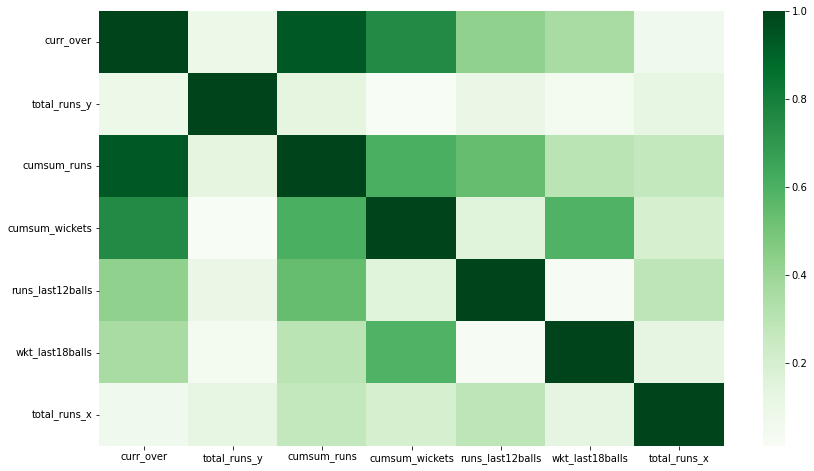

In [ ]:
sb.heatmap(abs(new_ipl.corr()), cmap='Greens')

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=6, shuffle=True)
print(f'Shape of x1_train : {x1_train.shape}')
print(f'Shape of x1_test : {x1_test.shape}')
print(f'Shape of y1_train : {y1_train.shape}')
print(f'Shape of y1_test : {y1_test.shape}')

Shape of x1_train : (134029, 6)
Shape of x1_test : (44677, 6)
Shape of y1_train : (134029,)
Shape of y1_test : (44677,)


In [ ]:
scaler = StandardScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

### Extra Trees Regressor

In [ ]:
ExtraTreesRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
%%time
param_grid4 = {
    'max_depth' : [20,25],
    'n_estimators' : [300,400,500]
}
gs_etr = GridSearchCV(ExtraTreesRegressor(), param_grid4)
gs_etr.fit(x1_train, y1_train)

CPU times: user 35min 3s, sys: 49.3 s, total: 35min 52s
Wall time: 35min 41s


In [ ]:
gs_etr.best_params_

{'max_depth': 20, 'n_estimators': 500}

In [ ]:
%%time
etr = ExtraTreesRegressor(random_state = 30, 
                          n_estimators = gs_etr.best_params_['n_estimators'], 
                          max_depth = gs_etr.best_params_['max_depth'])
etr.fit(x1_train, y1_train)
pred4 = etr.predict(x1_test).astype('int')

CPU times: user 1min 37s, sys: 379 ms, total: 1min 38s
Wall time: 1min 37s


In [ ]:
print(f'RMSE : {round(np.sqrt(mean_squared_error(y1_test, pred4)), 2)}')
print(f'R\u00b2 Score : {round(r2_score(y1_test, pred4), 2)}')
print(f'Accuracy : {round(custom_accuracy(y1_test, pred4, 10), 2)}%')

RMSE : 22.5
R² Score : 0.44
Accuracy : 46.72%


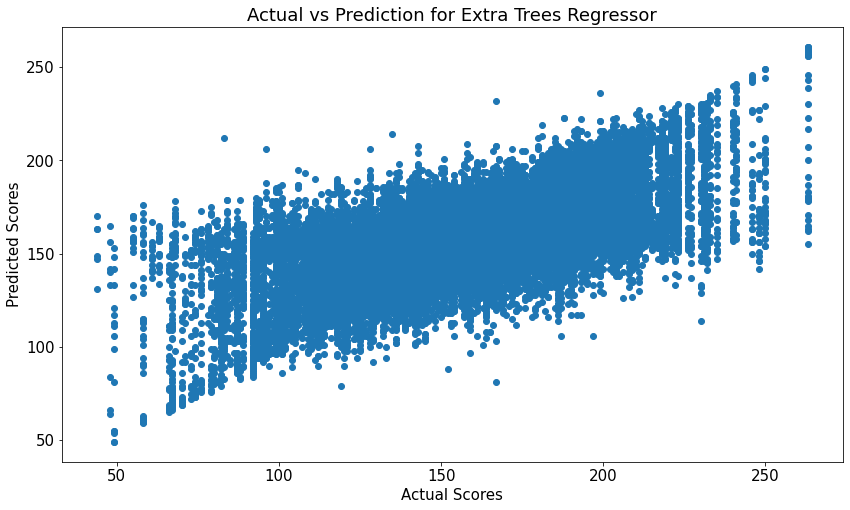

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.scatter(y1_test, pred4)
plt.title('Actual vs Prediction for Extra Trees Regressor')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

### Random Forest Regressor

In [ ]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
%%time
param_grid5 = {
    'n_estimators' : [200,300],
    'max_depth' : [10,20]
}
gs_rfr = GridSearchCV(RandomForestRegressor(), param_grid5, cv=5)
gs_rfr.fit(x1_train, y1_train)

CPU times: user 18min 4s, sys: 11.3 s, total: 18min 16s
Wall time: 18min 9s


In [ ]:
gs_rfr.best_params_

{'max_depth': 20, 'n_estimators': 300}

In [ ]:
%%time
rfr = RandomForestRegressor(random_state = 10, 
                            n_estimators = gs_rfr.best_params_['n_estimators'], 
                            max_depth = gs_rfr.best_params_['max_depth'])
rfr.fit(x1_train, y1_train)
pred5 = rfr.predict(x1_test).astype('int')

CPU times: user 1min 38s, sys: 2.52 s, total: 1min 40s
Wall time: 1min 40s


In [ ]:
print(f'RMSE : {round(np.sqrt(mean_squared_error(y1_test, pred5)), 2)}')
print(f'R\u00b2 Score : {round(r2_score(y1_test, pred5), 2)}')
print(f'Accuracy : {round(custom_accuracy(y1_test, pred5, 10), 2)}%')

RMSE : 22.73
R² Score : 0.43
Accuracy : 45.86%


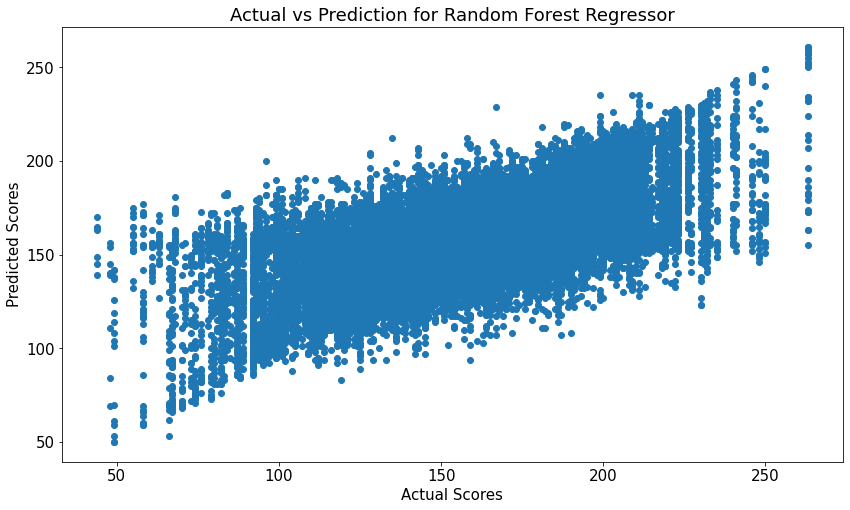

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.scatter(y1_test, pred5)
plt.title('Actual vs Prediction for Random Forest Regressor')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

### Gradient Boosting Regressor

In [ ]:
GradientBoostingRegressor().get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
%%time
param_grid6 = {
    'learning_rate' : [0.1,0.2,0.3],
    'max_depth' : [10, 15, 20]
}
gs_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid6, cv=5)
gs_gbr.fit(x1_train, y1_train)

CPU times: user 26min 3s, sys: 4.15 s, total: 26min 7s
Wall time: 25min 58s


In [ ]:
gs_gbr.best_params_

{'learning_rate': 0.1, 'max_depth': 10}

In [ ]:
%%time
gbr = GradientBoostingRegressor(n_estimators = 100, 
                                max_depth = gs_gbr.best_params_['max_depth'], 
                                learning_rate = gs_gbr.best_params_['learning_rate'])
gbr.fit(x1_train, y1_train)
pred6 = gbr.predict(x1_test).astype('int')

CPU times: user 31.5 s, sys: 136 ms, total: 31.7 s
Wall time: 31.5 s


In [ ]:
print(f'RMSE : {round(np.sqrt(mean_squared_error(y1_test, pred6)), 2)}')
print(f'R\u00b2 Score : {round(r2_score(y1_test, pred6), 2)}')
print(f'Accuracy : {round(custom_accuracy(y1_test, pred6, 10), 2)}%')

RMSE : 22.75
R² Score : 0.43
Accuracy : 45.27%


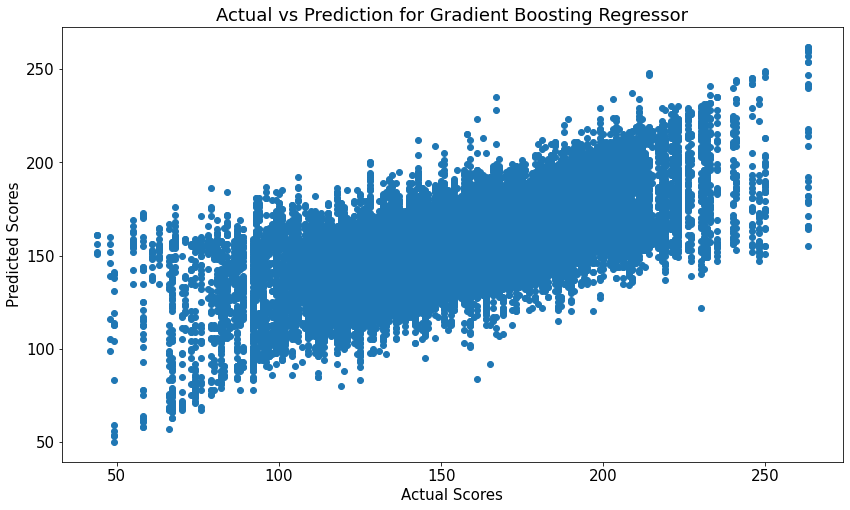

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.scatter(y1_test, pred6)
plt.title('Actual vs Prediction for Gradient Boosting Regressor')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

As we can see from above, **Extra Trees Regressor** model gives marginally better accuracy and less error as compared to other models.

# Deep Learning Models

### Classification Model

In [ ]:
model1 = Sequential()

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))

model1.compile(optimizer='adam', loss='mse')

In [ ]:
model1.fit(x=x_train, y=y_train, epochs=400, validation_data=(x_test,y_test))

Epoch 1/400
17/17 [==============================] - 1s 11ms/step - loss: 93.9020 - val_loss: 45.5539
Epoch 2/400
17/17 [==============================] - 0s 4ms/step - loss: 53.6530 - val_loss: 35.2000
Epoch 3/400
17/17 [==============================] - 0s 3ms/step - loss: 47.0903 - val_loss: 34.8844
Epoch 4/400
17/17 [==============================] - 0s 4ms/step - loss: 45.8444 - val_loss: 35.0500
Epoch 5/400
17/17 [==============================] - 0s 3ms/step - loss: 42.4657 - val_loss: 31.2764
Epoch 6/400
17/17 [==============================] - 0s 4ms/step - loss: 38.9992 - val_loss: 30.9794
Epoch 7/400
17/17 [==============================] - 0s 4ms/step - loss: 36.9045 - val_loss: 31.6574
Epoch 8/400
17/17 [==============================] - 0s 4ms/step - loss: 36.8159 - val_loss: 31.3790
Epoch 9/400
17/17 [==============================] - 0s 4ms/step - loss: 36.2175 - val_loss: 32.2146
Epoch 10/400
17/17 [==============================] - 0s 4ms/step - loss: 32.4914 - val_lo

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
print('Number of trainable parameters : 3,137')

Number of trainable parameters : 3,137


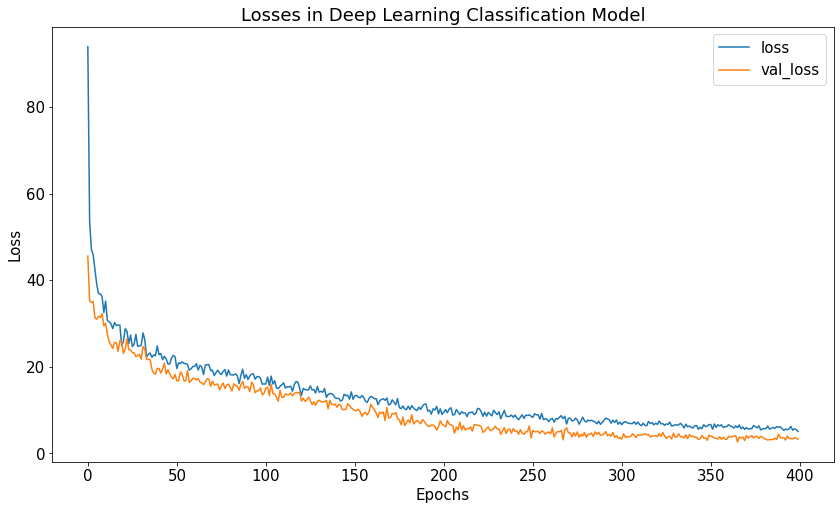

In [ ]:
loss1 = pd.DataFrame(model1.history.history)
plt.rcParams.update({'font.size': 15})
loss1.plot()
plt.title('Losses in Deep Learning Classification Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
pred7 = np.around(model1.predict(x_test),0)
print(f'Accuracy : {round(accuracy_score(y_test, pred7)*100,2)}%')
print(f'Precision : {round(precision_score(y_test, pred7, average="weighted")*100,2)}%')
print(f'Recall : {round(recall_score(y_test, pred7, average="weighted")*100,2)}%')
print(f'F1 Score : {round(f1_score(y_test, pred7, average="weighted")*100,2)}%')

Accuracy : 29.65%
Precision : 32.43%
Recall : 29.65%
F1 Score : 27.94%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Regression Model

In [135]:
model2 = Sequential()

model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse')

In [136]:
model2.fit(x=x1_train, y=y1_train, epochs=80,
		validation_data=(x1_test,y1_test))

Epoch 1/80
4189/4189 [==============================] - 10s 2ms/step - loss: 5492.8408 - val_loss: 1031.9468
Epoch 2/80
4189/4189 [==============================] - 9s 2ms/step - loss: 3701.5151 - val_loss: 1071.7161
Epoch 3/80
4189/4189 [==============================] - 8s 2ms/step - loss: 3471.2966 - val_loss: 938.1083
Epoch 4/80
4189/4189 [==============================] - 8s 2ms/step - loss: 3271.8296 - val_loss: 907.8010
Epoch 5/80
4189/4189 [==============================] - 8s 2ms/step - loss: 3128.4453 - val_loss: 889.5194
Epoch 6/80
4189/4189 [==============================] - 8s 2ms/step - loss: 2963.4197 - val_loss: 1013.6216
Epoch 7/80
4189/4189 [==============================] - 9s 2ms/step - loss: 2811.6938 - val_loss: 843.2548
Epoch 8/80
4189/4189 [==============================] - 9s 2ms/step - loss: 2663.5146 - val_loss: 860.5635
Epoch 9/80
4189/4189 [==============================] - 9s 2ms/step - loss: 2510.6941 - val_loss: 764.5492
Epoch 10/80
4189/4189 [==========

In [137]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                224       
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 50)                1650      
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                816       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [138]:
print('Number of trainable parameters : 2,707')

Number of trainable parameters : 2,707


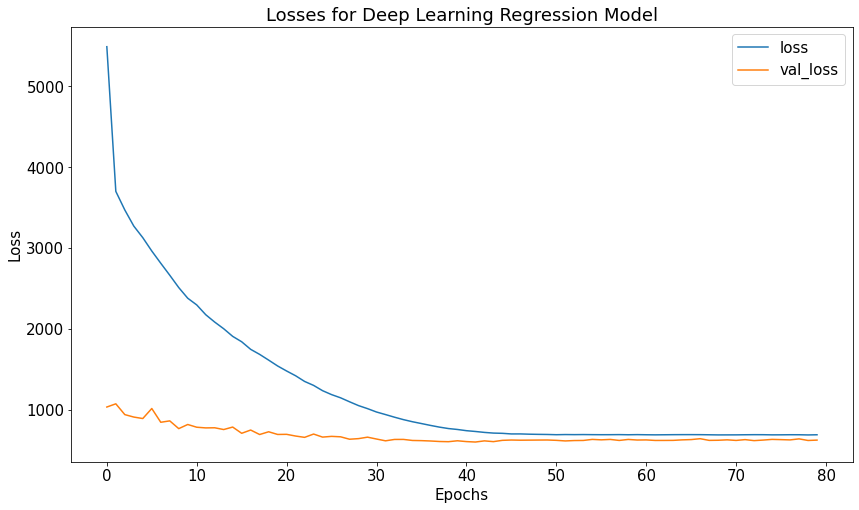

In [139]:
loss2 = pd.DataFrame(model2.history.history)
plt.rcParams.update({'font.size': 15})
loss2.plot()
plt.title('Losses for Deep Learning Regression Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [140]:
pred8 = model2.predict(x1_test).astype('int')
print(f'RMSE : {round(np.sqrt(mean_squared_error(y1_test, pred8)), 2)}')
print(f'R\u00b2 Score : {round(r2_score(y1_test, pred8), 2)}')
print(f'Accuracy : {round(custom_accuracy(y1_test, pred8, 10), 2)}%')

RMSE : 25.0
R² Score : 0.31
Accuracy : 38.54%


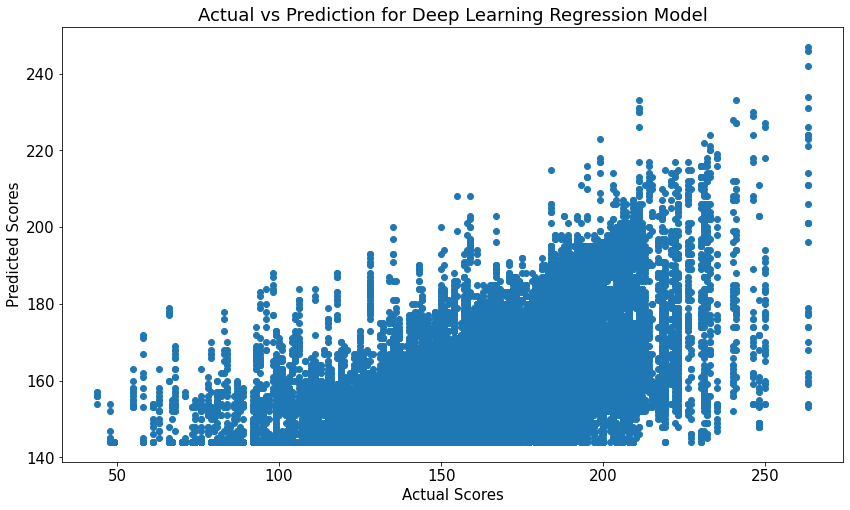

In [141]:
plt.rcParams.update({'font.size': 15})
plt.scatter(y1_test, pred8)
plt.title('Actual vs Prediction for Deep Learning Regression Model')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()